In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from diffdrr import load_example_ct, DRR
from diffdrr.visualization import plot_drr

In [2]:
# empty volume with one plane only containing random values
siz = 500
volume = np.zeros((siz, siz, siz))
volume[200, :, :] = np.random.rand(siz, siz)

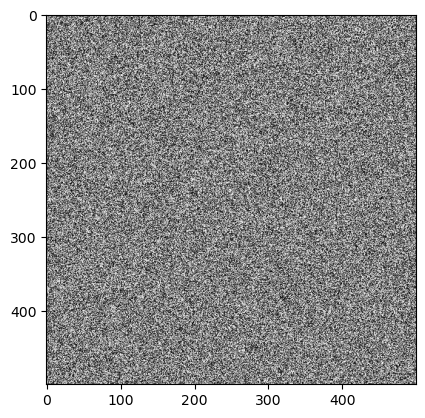

In [3]:
plt.imshow(volume[200], cmap="gray")
plt.show()

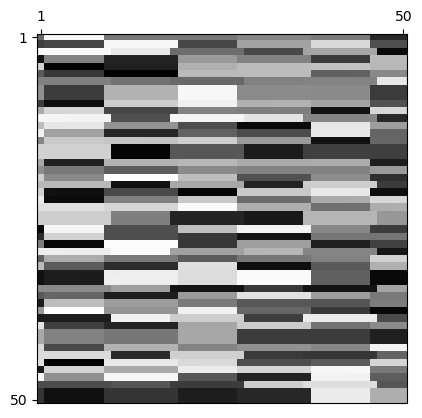

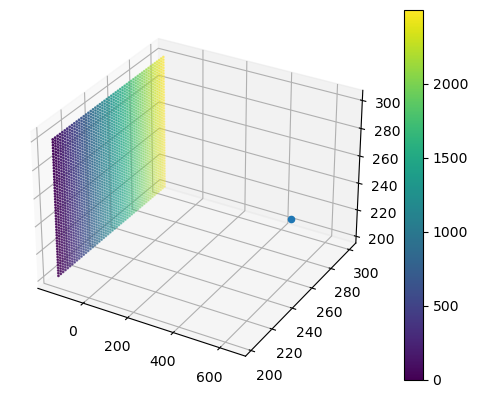

In [4]:
spacing = np.array([1., 1., 1.])

bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
detector_kwargs = {
    "sdr"   : 400.0,
    "theta" : 0,
    "phi"   : 0,
    "gamma" : 0,
    "bx"    : bx,
    "by"    : by,
    "bz"    : bz,
}

drr = DRR(volume, spacing, height=50, delx=2.0, device="cuda")
img = drr(**detector_kwargs)
ax = plot_drr(img)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
source, target = drr.detector.make_xrays(drr.sdr, drr.rotations, drr.translations)
src = source.squeeze().cpu().detach()
ax.scatter(src[0], src[1], src[2])
trg = target.squeeze().cpu().detach()
aximg = ax.scatter(trg[..., 0], trg[..., 1], trg[..., 2], s=1, c=range(target.shape[1]))
fig.colorbar(aximg)
plt.show()

In [5]:
def plot(t):
    plt.stem(t.squeeze().cpu().detach())
    plt.show()

In [10]:
t = target[:, 627:629]
alphas = drr.siddon.get_alphas(source, t)
alphamid = (alphas[..., 0:-1] + alphas[..., 1:]) / 2
idxs = drr.siddon.get_index(alphamid, source, t)

In [23]:
i = 0
idxs[:, i, :][torch.take(drr.siddon.volume, idxs[:, i, :]) > 0]

tensor([74869761], device='cuda:0')

In [24]:
i = 1
idxs[:, i, :][torch.take(drr.siddon.volume, idxs[:, i, :]) > 0]

tensor([74869761], device='cuda:0')

In [84]:
t = target
alphas = drr.siddon.get_alphas(source, t)
alphamid = (alphas[..., 0:-1] + alphas[..., 1:]) / 2
idxs = drr.siddon.get_index(alphamid, source, t)
voxels = torch.take(drr.siddon.volume, idxs)

In [85]:
# All only interesect one voxel
idxs[voxels <= 0] = 0
((idxs > 0).sum(-1) > 1).sum()

tensor(0, device='cuda:0')

In [86]:
step_length = torch.diff(alphas, dim=-1)
weighted_voxels = voxels * step_length

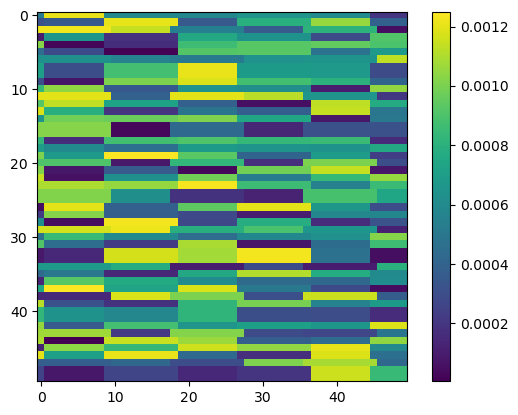

In [87]:
z = weighted_voxels.nansum(-1).reshape(50, 50)
plt.imshow(z.detach().squeeze().cpu())
plt.colorbar()

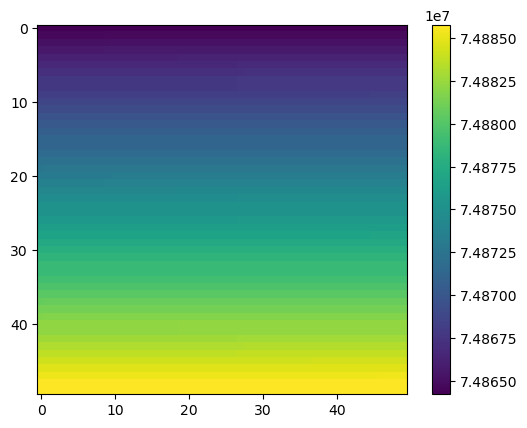

In [88]:
intersected = idxs[idxs > 0].reshape(50, 50)
plt.imshow(intersected.detach().squeeze().cpu())
plt.colorbar()

In [89]:
intersected

tensor([[74864225, 74864233, 74864233,  ..., 74864273, 74864273, 74864273],
        [74864721, 74864729, 74864729,  ..., 74864769, 74864769, 74864769],
        [74865233, 74865233, 74865233,  ..., 74865273, 74865273, 74865273],
        ...,
        [74885233, 74885233, 74885233,  ..., 74885273, 74885273, 74885273],
        [74885729, 74885737, 74885737,  ..., 74885777, 74885777, 74885777],
        [74885729, 74885737, 74885737,  ..., 74885777, 74885777, 74885777]],
       device='cuda:0')